<a href="https://colab.research.google.com/github/ashtonsouthwick/DSPS_ASouthwick/blob/main/HW9/Hw9_Southwick_in_class_clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import scipy as sp
from scipy import spatial
import seaborn as sns


%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/fbb.mplstyle")
np.set_printoptions(precision=2)
rcParams['figure.figsize'] = 10, 10


Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [ ]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/data/kidpackgenes.csv", index_col=0)

In [ ]:
# genes.head()

# 1. explore the data.

In [ ]:
# genes.shape

In [ ]:
# genes.describe()

In [ ]:
# genes.isna().sum().sum()

There are no missing values. The data consistes of 4224 observations and 75 gene expressions. A quick google search shows that this is as expected: https://www.bioconductor.org/packages/devel/data/experiment/manuals/kidpack/man/kidpack.pdf

array([[<Axes: xlabel='1', ylabel='1'>, <Axes: xlabel='2', ylabel='1'>,
        <Axes: xlabel='3', ylabel='1'>, ...,
        <Axes: xlabel='85', ylabel='1'>, <Axes: xlabel='86', ylabel='1'>,
        <Axes: xlabel='87', ylabel='1'>],
       [<Axes: xlabel='1', ylabel='2'>, <Axes: xlabel='2', ylabel='2'>,
        <Axes: xlabel='3', ylabel='2'>, ...,
        <Axes: xlabel='85', ylabel='2'>, <Axes: xlabel='86', ylabel='2'>,
        <Axes: xlabel='87', ylabel='2'>],
       [<Axes: xlabel='1', ylabel='3'>, <Axes: xlabel='2', ylabel='3'>,
        <Axes: xlabel='3', ylabel='3'>, ...,
        <Axes: xlabel='85', ylabel='3'>, <Axes: xlabel='86', ylabel='3'>,
        <Axes: xlabel='87', ylabel='3'>],
       ...,
       [<Axes: xlabel='1', ylabel='85'>, <Axes: xlabel='2', ylabel='85'>,
        <Axes: xlabel='3', ylabel='85'>, ...,
        <Axes: xlabel='85', ylabel='85'>,
        <Axes: xlabel='86', ylabel='85'>,
        <Axes: xlabel='87', ylabel='85'>],
       [<Axes: xlabel='1', ylabel='86'>, <

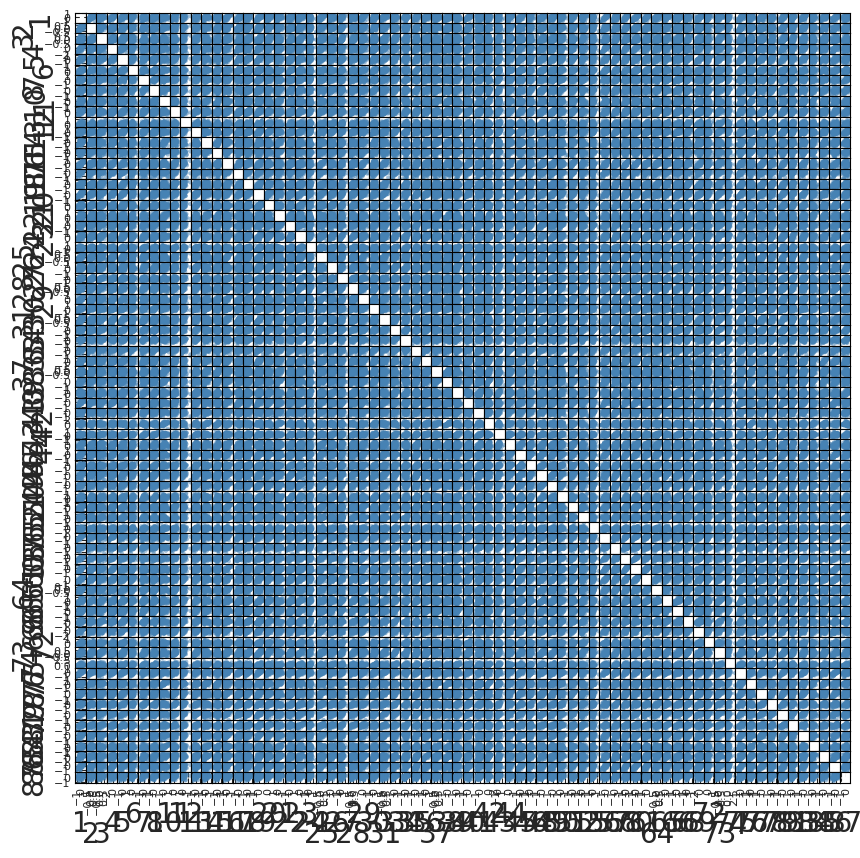

In [ ]:
np.random.seed(302)
pd.plotting.scatter_matrix(genes.iloc[np.random.randint(0, genes.shape[0], 100)])

## CAPTION

Previous gene scatter matrix. It is nearly impossible to tell what is going on, as the plot is so overcrowded and the axes labels are illegible.

In [13]:
corr = genes.corr()

Text(0.5, 1.0, 'Correlation Matrix of Gene Expression Data')

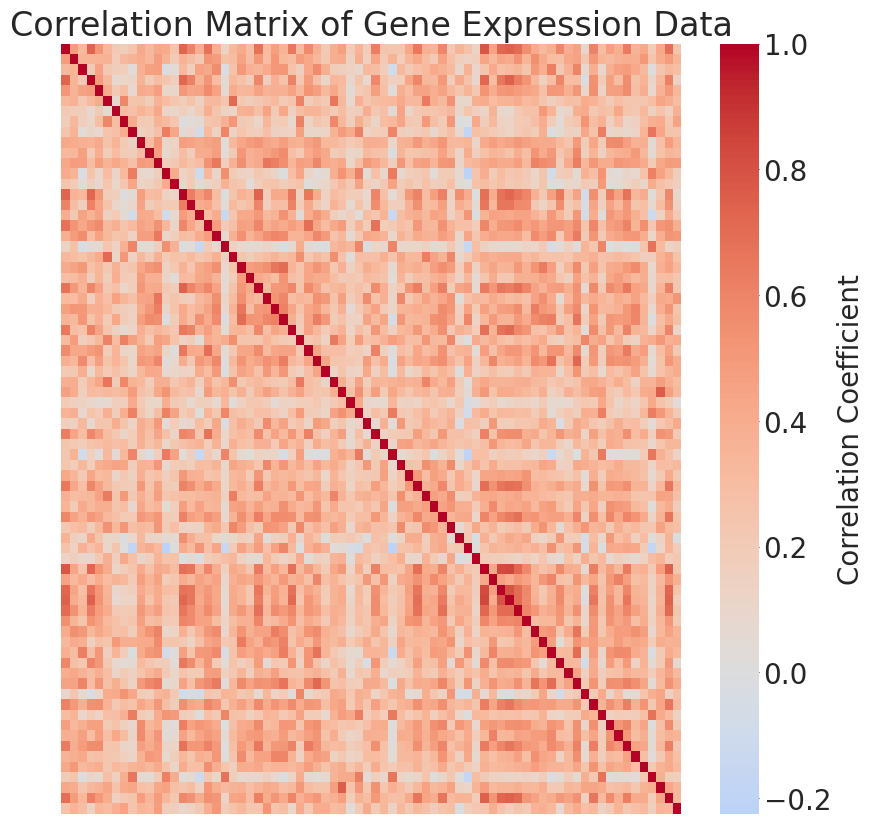

In [ ]:
sns.heatmap(corr, cmap='coolwarm', xticklabels=False, yticklabels=False, center=0, cbar_kws={'label': 'Correlation Coefficient'})
pl.title("Correlation Matrix of Gene Expression Data")

## CAPTION

Correlation matrix of gene expression data. For each pair of genes, they exhibit some sort of correlation across the 4224 observations. This shows that some genes are more functionally related than others. The bluer the squares, the more negatively correlated the gene pairs are. The redder the squares, the more positively correlated the gene pairs are. If the squares are white, they have no or little correlation. The red diagnal shows that each gene is correlated with itself.